### Data Wrangling with Python: Activity 9, page 294

Extracting the Top 100 eBooks from Gutenberg Project Gutenberg encourages the creation and distribution of eBooks by encouraging volunteer efforts to digitize and archive cultural works. This activity aims to scrape the URL of Project Gutenberg's Top 100 eBooks to identify the eBooks' links. It uses BeautifulSoup4 to parse the HTML and regular expression code to identify the Top 100 eBook file numbers. You can use those book ID numbers to download the book into your local drive if you want. Head over to the supplied Jupyter notebook (in the GitHub repository) to work on this activity. These are the steps that will help you solve this activity:

Import the necessary libraries, including regex and beautifulsoup.

In [59]:
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import ssl
import re

Check the SSL certificate.

In [60]:
# Ignore SSL certificate errors
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

Read the HTML from the URL.

In [61]:
# Reading the HTML from the URL
Gut_url = 'https://www.gutenberg.org/browse/scores/top'
response = requests.get(Gut_url)

Write a small function to check the status of the web request.

In [63]:
# Defining a function to check the status
def status_check(r):
    if r.status_code==200:
        print("Connection is successful")
        return 1
    else:
        print("Connection is failed")
        return -1


In [64]:
# Checking the status
status_check(response)

Connection is successful


1

Decode the response and pass this on to Beautiful Soup for HTML parsing.


In [65]:
# Getting the contents
contents = response.content.decode(response.encoding)

# Parsing the contents
soup = BeautifulSoup(contents,'html.parser')

Find all the href tags and store them in the list of links. Check what the list looks like - print the first 30 elements

In [67]:
# Creating the empty list
list_links = []

In [68]:
# Finding all the href links
for link in soup.find_all('a'):
    # Appending the list
    list_links.append(link.get('href'))

In [69]:
# View the first 30 href links
list_links[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 '#books-last1',
 '#authors-last1',
 '#books-last7']

Use a regular expression to find the numeric digits in these links. These are the file numbers for the top 100 eBooks.
Initialize the empty list to hold the file numbers over an appropriate range and use regex to find the numeric digits in the link href string. Use the findall method.


In [12]:
# Establish empty list
file_numbers = []

In [13]:
# Loop through the list of href links to find the numericals. Note: the links 33-133 contain the books
for i in range(33,133):
    l = href_list[i]
    # Remove whitespace
    l=l.strip()
    # Find the numericals in the link
    n=re.findall('[0-9]+',l)
    # If numericals are found, add the filenumber to the file_number list
    if len(n)==1:
        file_numbers.append(int(n[0]))

In [14]:
# View the file_numbers
print(file_numbers)

[1342, 84, 1661, 11, 1080, 2701, 98, 64317, 174, 345, 1952, 4300, 2554, 6130, 1232, 25344, 76, 67436, 67437, 1260, 18792, 5200, 1400, 67441, 46, 2600, 67435, 2591, 219, 205, 1497, 844, 28054, 2542, 514, 408, 67434, 43, 1184, 5740, 67433, 67429, 32449, 45, 26184, 27827, 55283, 4363, 103, 158, 58585, 30254, 120, 67430, 135, 996, 74, 35, 2814, 16, 55, 1399, 3207, 1727, 768, 7370, 863, 43453, 3600, 67098, 16328, 600, 67432, 209, 160, 20203, 1998, 105, 36, 23, 203, 67431, 829, 730, 10, 244, 161, 215, 33283, 15399, 2434, 19942, 2852, 113, 24518, 42108, 3296, 31284, 236, 67443]


What does the soup object's text look like? Use the .text method and print only the first 2,000 characters (do not print the whole thing, as it is too long).

In [15]:
# Print the first 2000 character
print(soup.text[:2000])





Top 100 | Project Gutenberg



























Menu▾



About
          ▾

▾


About Project Gutenberg
Collection Development
Contact Us
History & Philosophy
Permissions & License
Privacy Policy
Terms of Use



Search and Browse
      	  ▾

▾


Book Search
Bookshelves
Frequently Downloaded
Offline Catalogs



Help
          ▾

▾


All help topics →
Copyright Procedures
Errata, Fixes and Bug Reports
File Formats
Frequently Asked Questions
Policies →
Public Domain eBook Submission
Submitting Your Own Work
Tablets, Phones and eReaders
The Attic →


Donate










Donation







Frequently Viewed or Downloaded
These listings are based on the number of times each eBook gets downloaded.
      Multiple downloads from the same Internet address on the same day count as one download, and addresses that download more than 100 eBooks in a day are considered robots and are not counted.

Downloaded Books
2022-02-19106437
last 7 days915202
last 30 days4198137



Top 100 EBooks yesterda

Search in the extracted text (using a regular expression) from the soup object to find the names of the top 100 eBooks (yesterday's ranking).

In [20]:
# Create an empty list of eBook names
e_books = []

Create a starting index. It should point at the text Top 100 Ebooks yesterday. Use the splitlines method of soup.text. It splits the lines of text of the soup object.

In [21]:
# Create the starting index
starting_index = soup.text.splitlines().index('Top 100 EBooks yesterday')+9

Loop 1-100 to add the strings of the next 100 lines to this temporary list. Hint: use the splitlines method.

In [22]:
# Loop through the books and add them to the list
for i in range(101):
    e_books.append(soup.text.splitlines()[starting_index+i])

In [23]:
# view the list of books
for book in e_books:
    print(book)


Pride and Prejudice by Jane Austen (1075)
Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley (858)
The Adventures of Sherlock Holmes by Arthur Conan Doyle (592)
Alice's Adventures in Wonderland by Lewis Carroll (565)
A Modest Proposal by Jonathan Swift (494)
Moby Dick; Or, The Whale by Herman Melville (458)
A Tale of Two Cities by Charles Dickens (361)
The Great Gatsby by F. Scott  Fitzgerald (354)
The Picture of Dorian Gray by Oscar Wilde (352)
Dracula by Bram Stoker (352)
The Yellow Wallpaper by Charlotte Perkins Gilman (348)
Ulysses by James Joyce (314)
Crime and Punishment by Fyodor Dostoyevsky (288)
The Iliad by Homer (284)
The Prince by Niccolò Machiavelli (278)
The Scarlet Letter by Nathaniel Hawthorne (271)
Adventures of Huckleberry Finn by Mark Twain (263)
Autumn Leaves by Ardelia Maria Cotton Barton (257)
Dr. Paull’s Theory: A Romance by Alice M.  Diehl (257)
Jane Eyre: An Autobiography by Charlotte Brontë (249)
John Gabriel Borkman by Henrik Ibsen (248)


Use a regular expression to extract only text from the name strings and append it to an empty list. Use match and span to find the indices and use them.

In [24]:
# Create the empty list
top_100_ebooks = []

In [25]:
# Remove the non-text
for i in range(100):
    start,stop=re.match('^[a-zA-Z ]*',e_books[i]).span()
    top_100_ebooks.append(e_books[i][start:stop])

In [26]:
# View the list of book titles
for book in top_100_ebooks:
    print(book)


Pride and Prejudice by Jane Austen 
Frankenstein
The Adventures of Sherlock Holmes by Arthur Conan Doyle 
Alice
A Modest Proposal by Jonathan Swift 
Moby Dick
A Tale of Two Cities by Charles Dickens 
The Great Gatsby by F
The Picture of Dorian Gray by Oscar Wilde 
Dracula by Bram Stoker 
The Yellow Wallpaper by Charlotte Perkins Gilman 
Ulysses by James Joyce 
Crime and Punishment by Fyodor Dostoyevsky 
The Iliad by Homer 
The Prince by Niccol
The Scarlet Letter by Nathaniel Hawthorne 
Adventures of Huckleberry Finn by Mark Twain 
Autumn Leaves by Ardelia Maria Cotton Barton 
Dr
Jane Eyre
John Gabriel Borkman by Henrik Ibsen 
Metamorphosis by Franz Kafka 
Great Expectations by Charles Dickens 
An Indian Ass by Harold Acton 
A Christmas Carol in Prose
War and Peace by graf Leo Tolstoy 
The honey
Grimms
Heart of Darkness by Joseph Conrad 
Walden
The Republic by Plato 
The Importance of Being Earnest
The Brothers Karamazov by Fyodor Dostoyevsky 
A Doll
Little Women by Louisa May Alcott 


### Data Wrangling with Python: Activity 10, page 295

Import urlib.request, urllib.parse, urllib.error, and json

In [27]:
# Load libraries
import urllib.request, urllib.parse, urllib.error
import json

Load the secret API key (you have to get one from the OMDb website and use that; it has a daily limit of 1,000) from a JSON file stored in the same folder in a variable, by using json.loads.

In [59]:
# Load the API key from the JSON file
with open('Data/download.json') as f:
    data = json.load(f)
    omdbapi = data['imdbID']

Assign the OMDb portal as a string to a variable

In [60]:
# Assign the portal to a variable
base_url = 'http://www.omdbapi.com/?'

Create a variable called apikey with the last portion of the URL (&apikey=secretapikey), where secretapikey is your own API key.

In [61]:
# Create the apikey variable
apikey = '&apikey=50ebe64b'

Write a utility function called print_json to print the movie data from a JSON file (which we will get from the portal).

In [62]:
# Define the print_json function
def print_json(data):
    keys = ['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
            'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings',
            'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    # print the data
    for k in keys:
        if k in list(data.keys()):
            print(f"{k}: {data[k]}")


print_json(data)            

Title: Guardians of the Galaxy Vol. 2
Year: 2017
Rated: PG-13
Released: 05 May 2017
Runtime: 136 min
Genre: Action, Adventure, Comedy
Director: James Gunn
Writer: James Gunn, Dan Abnett, Andy Lanning
Actors: Chris Pratt, Zoe Saldana, Dave Bautista
Plot: The Guardians struggle to keep together as a team while dealing with their personal family issues, notably Star-Lord's encounter with his father the ambitious celestial being Ego.
Language: English
Country: United States
Awards: Nominated for 1 Oscar. 15 wins & 58 nominations total
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.6/10'}, {'Source': 'Rotten Tomatoes', 'Value': '85%'}, {'Source': 'Metacritic', 'Value': '67/100'}]
Metascore: 67
imdbRating: 7.6
imdbVotes: 636,391
imdbID: tt3896198


Write a utility function to download a poster of the movie based on the information from the JSON dataset and save it in your local folder. Use the os module. The poster data is stored in the JSON key Poster. Use the Python command to open a file and write the poster data. Close the file after you're done. This function will save the poster data as an image file.


In [63]:
def save_poster(data):
    # Load libraries
    import os
    # Obtain the title & poster from the data
    title = data['Title']
    poster_url = data['Poster']
    # Obtain the file extension
    poster_file_extension=poster_url.split('.')[-1]
    # Read the file
    poster_data = urllib.request.urlopen(poster_url).read()
    # Obtain/Create the file directory for the poster
    savelocation=os.getcwd()+'\\'+'Posters'+'\\'
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
    # Establish the filename & save the file
    filename=savelocation+str(title)+'.'+poster_file_extension
    f=open(filename,'wb')
    f.write(poster_data)
    f.close()
    

save_poster(data)    

Write a utility function called search_movie to search for a movie by its name, print the downloaded JSON data, and save the movie poster in the local folder. Use a try-except loop for this. Use the previously created serviceurl and apikey variables. You have to pass on a dictionary with a key, t, and the movie name as the corresponding value to the urllib.parse.urlencode() function and then add the serviceurl and apikey to the output of the function to construct the full URL. This URL will be used to access the data. The JSON data has a key called Response. If it is True, that means the read was successful. Check this before processing the data. If it's not successful, then print the JSON key Error, which will contain the appropriate error message returned by the movie database.


In [54]:
# Create the function to search for a movie
def find_movie(title):
    try:
        #Build the url from the base, title, & api key
        url = base_url + urllib.parse.urlencode({'t': str(title)})+apikey
        print(f'Retrieving the data of "{title}" now... ')
        print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        
        # If a response is received, print the data & save the poster
        if json_data['Response']=='True':
            print_json(json_data)
            if json_data['Poster']!='N/A':
                save_poster(json_data)
        # If a valid response is not received, print an error
        else:
            print("Error encountered: ",json_data['Error'])
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")

Test the search_movie function by entering Titanic.


In [55]:
# Search for the movie Titanic
find_movie('Titanic')

Retrieving the data of "Titanic" now... 
http://www.omdbapi.com/?t=Titanic&apikey=50ebe64b
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: United States, Mexico
Awards: Won 11 Oscars. 125 wins & 83 nominations total
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.8/10'}, {'Source': 'Rotten Tomatoes', 'Value': '89%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.8
imdbVotes: 1,117,107
imdbID: tt0120338


Test the search_movie function by entering "Random_error" (obviously, this will not be found, and you should be able to check whether your error catching code is working properly).

In [56]:
# Search for Random_error
find_movie('Random_error')

Retrieving the data of "Random_error" now... 
http://www.omdbapi.com/?t=Random_error&apikey=50ebe64b
Error encountered:  Movie not found!


In [5]:
pip install python-twitter

Note: you may need to restart the kernel to use updated packages.


Connect to the Twitter API and do a simple data pull

In [1]:
# Load library
import twitter

# Setup api
api = twitter.Api(consumer_key='s7MSWyqi9M3fxUrrLOUcUDXeJ',
                  consumer_secret='WMYNPvBbw7OyYfW9nHNDXHSMtUeOgLgMjB5azmPJrMuUAB1xJM',
                  access_token_key='92735663-n5QszNFQ6yBiQ7k3WPtGUwgvWKhwDRT3H38miEcsn',
                  access_token_secret='WHuSR39x6IHbQbf3C9JSYRMImk0pjS9Rji2IAGzso7aH9')

In [3]:
# Validate credentials
print(api.VerifyCredentials())

{"created_at": "Thu Nov 26 11:27:02 +0000 2009", "default_profile": true, "favourites_count": 27, "followers_count": 13, "friends_count": 39, "id": 92735663, "id_str": "92735663", "location": "Illinois, USA", "name": "Sharath Chandra", "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_image_url": "http://pbs.twimg.com/profile_images/1368719556240367628/k4508ucy_normal.jpg", "profile_image_url_https": "https://pbs.twimg.com/profile_images/1368719556240367628/k4508ucy_normal.jpg", "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "protected": true, "screen_name": "sharathc77", "withheld_in_countries": []}


In [4]:
# Search for tweets containing "Bellevue University"
api.GetSearch(term='Bellevue University', since=2022-1-1, count=10)

[Status(ID=1495677520791969795, ScreenName=Thelead365, Created=Mon Feb 21 08:31:23 +0000 2022, Text='Baseball: @DroverAthletics Vs Bellevue University 2/20/2022\n\n📸 &gt; https://t.co/Vb4EMAyl1W https://t.co/nas44DmCtI'),
 Status(ID=1495638512716111872, ScreenName=Payton_m25, Created=Mon Feb 21 05:56:23 +0000 2022, Text='RT @DroverAthletics: ⚾️STARTING LINEUP⚾️\n#14 Science &amp; Arts 🆚 #24 Bellevue University\n\n⏰: 12:00 PM\n📍: Chickasha, OK\n🏟️: Bill Smith Ballpark…'),
 Status(ID=1495580228516671488, ScreenName=Bulldog_Dave, Created=Mon Feb 21 02:04:47 +0000 2022, Text='3022 WIAA 4A Boys State Tournament District 8 Teams Schedule State Regionals\n\n2-26-22\nGonzaga Prep vs Mount Si 2pm… https://t.co/uxZsaYWc0j'),
 Status(ID=1495579497135058947, ScreenName=SpokesmanSports, Created=Mon Feb 21 02:01:53 +0000 2022, Text='RT @DNicholsSR: -Gonzaga Prep boys play Mount Si Sat 2 pm at Bellevue College.\n-Central Valley boys play Woodinville Sat at 6 pm at Univers…'),
 Status(ID=1495579458652

In [5]:
# Search for tweets containing "Data Science"
api.GetSearch(term='Data Science', since=2022-1-1, count=10)

[Status(ID=1495439375336890377, ScreenName=ScienceMagazine, Created=Sun Feb 20 16:45:05 +0000 2022, Text='A recent Science analysis of data from U.S. military recruits suggests multiple sclerosis—a disease considered of u… https://t.co/YiePJJP24W'),
 Status(ID=1495591241110929408, ScreenName=EricRWeinstein, Created=Mon Feb 21 02:48:33 +0000 2022, Text='Challenge: defend this.\n\nPublic Health is NOT part of science. It just isn’t. It’s an abomination. This is an open… https://t.co/zC2KrU6506'),
 Status(ID=1495166645232300032, ScreenName=Zigmanfreud, Created=Sat Feb 19 22:41:21 +0000 2022, Text='So true…\n\nThe “science” totally shifted on masks in May 2020 purely for political reasons, forcing many millions to… https://t.co/aJw9xX9HfP'),
 Status(ID=1495709494919282691, ScreenName=EmilioMaciel9, Created=Mon Feb 21 10:38:27 +0000 2022, Text='RT @EricRWeinstein: Challenge: defend this.\n\nPublic Health is NOT part of science. It just isn’t. It’s an abomination. This is an open cons…'),
 S

Using one of the datasets provided in Weeks 7 & 8, or a dataset of your own, choose 3 of the following visualizations to complete. You must submit via PDF along with your code. You are free to use Matplotlib, Seaborn or another package if you prefer.

In [30]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [27]:
# Load the data
Covid_df = pd.read_csv('Data/CovidCases.csv')

# Validate the dataload
Covid_df.head()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,1/30/20,Kerala,10.8505,76.2711,1,0,0,0,0,0
1,1/31/20,Kerala,10.8505,76.2711,1,0,0,0,0,0
2,2/1/20,Kerala,10.8505,76.2711,2,0,0,1,0,0
3,2/2/20,Kerala,10.8505,76.2711,3,0,0,1,0,0
4,2/3/20,Kerala,10.8505,76.2711,3,0,0,0,0,0


In [28]:
# View the dataset
Covid_df.head()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,1/30/20,Kerala,10.8505,76.2711,1,0,0,0,0,0
1,1/31/20,Kerala,10.8505,76.2711,1,0,0,0,0,0
2,2/1/20,Kerala,10.8505,76.2711,2,0,0,1,0,0
3,2/2/20,Kerala,10.8505,76.2711,3,0,0,1,0,0
4,2/3/20,Kerala,10.8505,76.2711,3,0,0,0,0,0


Scatter plot

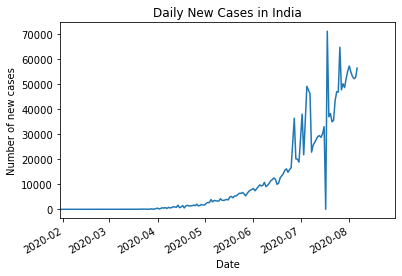

In [34]:
# Creating a Line graph of Total Confirmed Cases by day.

Covid_df['Date'] =  pd.to_datetime(Covid_df['Date'])
Covid_df.groupby('Date')['New cases'].sum().plot(kind='line')
plt.gca().set_xbound(dt.date(2020, 1, 30), dt.date(2020, 8, 30))
plt.title('Daily New Cases in India')          #Adding a title to the graph
plt.xlabel('Date')                             #Labeling the axis to the graph
plt.ylabel('Number of new cases')
plt.show()

Bar plot

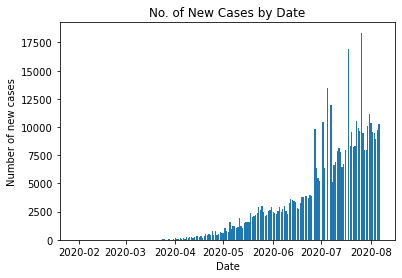

In [36]:
# Creating a bar Chart of the new cases every day.

plt.bar(Covid_df['Date'], Covid_df['New cases'])
plt.xlabel('Date')
plt.ylabel('Number of new cases')
plt.title('No. of New Cases by Date')
plt.show()

Histogram

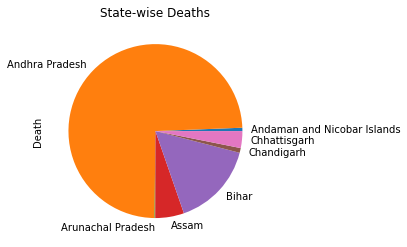

In [57]:
# Creating a pie chart of state-wise deaths for the Top 6 States by death

Covid_df['Death'] =  pd.to_numeric(Covid_df['Death'])
Covid_df.groupby('Name of State / UT')['Death'].max().head(7).plot(kind='pie',title='State-wise Deaths')
plt.show()